<a href="https://colab.research.google.com/github/rahiakela/hands-on-machine-learning-with-scikit-learn-keras-and-tensorflow/blob/10-introduction-to-artificial-neural-networks-with-keras/building_complex_models_using_functional_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Complex Models Using the Functional API

One example of a nonsequential neural network is a Wide & Deep neural network. This neural network architecture was introduced in a 2016 paper by Heng-Tze Cheng et al. It connects all or part of the inputs directly to the output layer.

This architecture makes it possible for the neural network to learn both deep patterns (using the deep path) and simple rules (through the short path). In contrast, a regular MLP forces all the data to flow through the full stack of layers; thus, simple patterns in the data may end up being distorted by this sequence of transformations.

<img src='https://github.com/rahiakela/img-repo/blob/master/hands-on-machine-learning-keras-tensorflow/wide-deep-neural-network-1.JPG?raw=1' width='800'/>

## Setup

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [0]:
from tensorflow import keras

## Load database

Let’s switch to the California housing problem and tackle it using a regression neural network. For simplicity, we will use Scikit-Learn’s fetch_california_housing() function to load the data.

After loading the data, we split it into a training set, a validation set, and a test set, and we scale all the features:

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load dataset
housing = fetch_california_housing()

# split dataset into traing and test set 
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)

# prepare validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

# scale all the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

## Build, train and evaluate the model using Functional API

### Simple model

In [6]:
input_layer = keras.layers.Input(shape=X_train.shape[1:])

hidden_layer_1 = keras.layers.Dense(30, activation='relu')(input_layer)
hidden_layer_2 = keras.layers.Dense(30, activation='relu')(hidden_layer_1)

# we create a Concatenate layer to concatenate the input and the output of the second hidden layer.
concat_layer = keras.layers.Concatenate()([input_layer, hidden_layer_2])

output_layer = keras.layers.Dense(1)(concat_layer)

model_1 = keras.Model(inputs=[input_layer], outputs=[output_layer])

model_1.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 30)           270         input_2[0][0]                    
__________________________________________________________________________________________________
dense_4 (Dense)                 (None, 30)           930         dense_3[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_2[0][0]                    
                                                                 dense_4[0][0]              

You should name at least the most important layers, especially when the model gets a bit complex like this.

In [7]:
input_layer = keras.layers.Input(shape=X_train.shape[1:], name='input_layer')

hidden_layer_1 = keras.layers.Dense(30, activation='relu', name='hidden_layer_1')(input_layer)
hidden_layer_2 = keras.layers.Dense(30, activation='relu', name='hidden_layer_2')(hidden_layer_1)

# we create a Concatenate layer to concatenate the input and the output of the second hidden layer.
concat_layer = keras.layers.Concatenate(name='concat_layer')([input_layer, hidden_layer_2])

output_layer = keras.layers.Dense(1, name='output_layer')(concat_layer)

model_2 = keras.Model(inputs=[input_layer], outputs=[output_layer])

model_2.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_layer (InputLayer)        [(None, 8)]          0                                            
__________________________________________________________________________________________________
hidden_layer_1 (Dense)          (None, 30)           270         input_layer[0][0]                
__________________________________________________________________________________________________
hidden_layer_2 (Dense)          (None, 30)           930         hidden_layer_1[0][0]             
__________________________________________________________________________________________________
concat_layer (Concatenate)      (None, 38)           0           input_layer[0][0]                
                                                                 hidden_layer_2[0][0]       

In [28]:
# compile the model
model_2.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss='mean_squared_error')

# train the model
history = model_2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 1s 100us/sample - loss: 0.4208 - val_loss: 0.4428
Epoch 2/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4177 - val_loss: 0.5485
Epoch 3/20
11610/11610 [==============================] - 1s 70us/sample - loss: 0.4154 - val_loss: 0.4682
Epoch 4/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4128 - val_loss: 0.4544
Epoch 5/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4103 - val_loss: 0.4214
Epoch 6/20
11610/11610 [==============================] - 1s 67us/sample - loss: 0.4077 - val_loss: 0.5123
Epoch 7/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4060 - val_loss: 0.4735
Epoch 8/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.4037 - val_loss: 0.4967
Epoch 9/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.4020 - val_

In [0]:
# evaluate the model
mse_test = model_2.evaluate(X_test, y_test)

In [0]:

# make prediction
X_new = X_test[:3]
y_pred = model_2.predict(X_new)

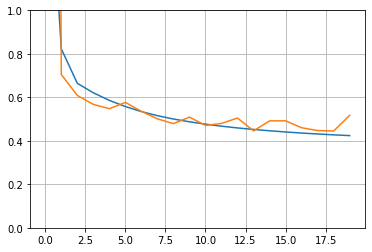

In [10]:
import pandas as pd

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
y_pred

array([[0.7036232],
       [1.7173119],
       [3.4689217]], dtype=float32)

### Complex Model of different subsets of input features through the wide or deep paths

But what if you want to send a subset of the features through the wide path and a different subset (possibly overlapping) through the deep path.

In this case, one solution is to use multiple inputs. 

For example, suppose we want to send five features through the wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

<img src='https://github.com/rahiakela/img-repo/blob/master/hands-on-machine-learning-keras-tensorflow/wide-deep-neural-network-2.JPG?raw=1' width='800'/>

In [8]:
wide_input_layer = keras.layers.Input(shape=[5], name='wide_input_layer')
deep_input_layer = keras.layers.Input(shape=[6], name='deep_input_layer')

hidden_layer_1 = keras.layers.Dense(30, activation='relu', name='hidden_layer_1')(deep_input_layer)
hidden_layer_2 = keras.layers.Dense(30, activation='relu', name='hidden_layer_2')(hidden_layer_1)

# we create a Concatenate layer to concatenate the input and the output of the second hidden layer.
concat_layer = keras.layers.Concatenate(name='concat_layer')([wide_input_layer, hidden_layer_2])

output_layer = keras.layers.Dense(1, name='output_layer')(concat_layer)

model_3 = keras.Model(inputs=[wide_input_layer, deep_input_layer], outputs=[output_layer])

model_3.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input_layer (InputLayer)   [(None, 6)]          0                                            
__________________________________________________________________________________________________
hidden_layer_1 (Dense)          (None, 30)           210         deep_input_layer[0][0]           
__________________________________________________________________________________________________
wide_input_layer (InputLayer)   [(None, 5)]          0                                            
__________________________________________________________________________________________________
hidden_layer_2 (Dense)          (None, 30)           930         hidden_layer_1[0][0]             
____________________________________________________________________________________________

Note that we specified inputs=[input_A, input_B] when creating the model. 

Now we can compile the model as usual, but when we call the fit() method, instead of passing a single input matrix X_train , we must pass a pair of matrices (X_train_A, X_train_B) : one per input. 

The same is true for X_valid , and also for X_test and X_new when you call evaluate() or predict()

In [24]:
# compile the model
model_3.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-3), loss='mse')

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]

X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# train the model
history_3 = model_3.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 150us/sample - loss: 0.3980 - val_loss: 0.3756
Epoch 2/20
11610/11610 [==============================] - 1s 71us/sample - loss: 0.3970 - val_loss: 0.3734
Epoch 3/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3965 - val_loss: 0.3728
Epoch 4/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3953 - val_loss: 0.3806
Epoch 5/20
11610/11610 [==============================] - 1s 65us/sample - loss: 0.3949 - val_loss: 0.3741
Epoch 6/20
11610/11610 [==============================] - 1s 66us/sample - loss: 0.3939 - val_loss: 0.3709
Epoch 7/20
11610/11610 [==============================] - 1s 64us/sample - loss: 0.3935 - val_loss: 0.3705
Epoch 8/20
11610/11610 [==============================] - 1s 69us/sample - loss: 0.3924 - val_loss: 0.3694
Epoch 9/20
11610/11610 [==============================] - 1s 68us/sample - loss: 0.3918 - val_

In [0]:
# evaluate the model
mse_test_3 = model_3.evaluate((X_test_A, X_test_B), y_test)

In [0]:
# make prediction
y_pred_3 = model_3.predict((X_new_A, X_new_B))

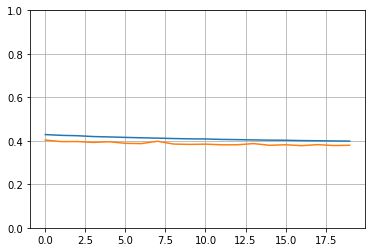

In [14]:
import pandas as pd

plt.plot(pd.DataFrame(history_3.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
y_pred_3

array([[0.43577743],
       [2.211489  ],
       [3.3451598 ]], dtype=float32)

There are many use cases in which you may want to have multiple outputs: 
* The task may demand it. For instance, you may want to locate and classify the main object in a picture. This is both a regression task (finding the coordinates of the object’s center, as well as its width and height) and a classification task. 
* Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.

### Handling multiple outputs by adding an auxiliary output for regularization

Another use case is as a regularization technique (i.e., a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

<img src='https://github.com/rahiakela/img-repo/blob/master/hands-on-machine-learning-keras-tensorflow/wide-deep-neural-network-3.JPG?raw=1' width='800'/>

Adding extra outputs is quite easy: just connect them to the appropriate layers and add them to your model’s list of outputs.

In [16]:
wide_input_layer = keras.layers.Input(shape=[5], name='wide_input_layer')
deep_input_layer = keras.layers.Input(shape=[6], name='deep_input_layer')

hidden_layer_1 = keras.layers.Dense(30, activation='relu', name='hidden_layer_1')(deep_input_layer)
hidden_layer_2 = keras.layers.Dense(30, activation='relu', name='hidden_layer_2')(hidden_layer_1)

# we create a Concatenate layer to concatenate the input and the output of the second hidden layer.
concat_layer = keras.layers.Concatenate(name='concat_layer')([wide_input_layer, hidden_layer_2])

main_output_layer = keras.layers.Dense(1, name='main_output_layer')(concat_layer)
auxiliary_output_layer = keras.layers.Dense(1, name='auxiliary_output_layer')(hidden_layer_2)

model_4 = keras.Model(inputs=[wide_input_layer, deep_input_layer], outputs=[main_output_layer, auxiliary_output_layer])

model_4.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input_layer (InputLayer)   [(None, 6)]          0                                            
__________________________________________________________________________________________________
hidden_layer_1 (Dense)          (None, 30)           210         deep_input_layer[0][0]           
__________________________________________________________________________________________________
wide_input_layer (InputLayer)   [(None, 5)]          0                                            
__________________________________________________________________________________________________
hidden_layer_2 (Dense)          (None, 30)           930         hidden_layer_1[0][0]             
____________________________________________________________________________________________

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses (if we pass a single loss, Keras will assume that the same loss must be used for all outputs). 

By default, Keras will compute all these losses and simply add them up to get the final loss used for training. We care much more about the main output than about the auxiliary output (as it is just used for regularization), so we want to give the main output’s loss a much greater weight. 

Fortunately, it is possible to set all the loss weights when compiling the model:

In [0]:
model_4.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer='sgd')

Now when we train the model, we need to provide labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. 

So instead of passing y_train , we need to pass (y_train, y_train) (and the same goes for y_valid and y_test ):

In [18]:
history_4 = model_4.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 135us/sample - loss: 1.1501 - main_output_layer_loss: 0.9745 - auxiliary_output_layer_loss: 2.7273 - val_loss: 0.9434 - val_main_output_layer_loss: 0.7758 - val_auxiliary_output_layer_loss: 2.4488
Epoch 2/20
11610/11610 [==============================] - 1s 78us/sample - loss: 0.5487 - main_output_layer_loss: 0.4837 - auxiliary_output_layer_loss: 1.1333 - val_loss: 0.8921 - val_main_output_layer_loss: 0.8022 - val_auxiliary_output_layer_loss: 1.6975
Epoch 3/20
11610/11610 [==============================] - 1s 75us/sample - loss: 0.4935 - main_output_layer_loss: 0.4440 - auxiliary_output_layer_loss: 0.9396 - val_loss: 0.9190 - val_main_output_layer_loss: 0.8958 - val_auxiliary_output_layer_loss: 1.1239
Epoch 4/20
11610/11610 [==============================] - 1s 74us/sample - loss: 0.4651 - main_output_layer_loss: 0.4274 - auxiliary_output_layer_loss: 0.8039 - val_loss: 1.1466 -

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [0]:
total_loss, main_loss, aux_loss = model_4.evaluate([X_test_A, X_test_B], [y_test, y_test])

Similarly, the predict() method will return predictions for each output:

In [0]:
y_pred_main, y_pred_aux = model_4.predict([X_new_A, X_new_B])

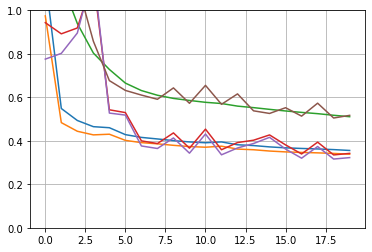

In [21]:
plt.plot(pd.DataFrame(history_4.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
y_pred_main

array([[0.39339703],
       [1.6305541 ],
       [3.5864131 ]], dtype=float32)

In [23]:
y_pred_aux

array([[0.78110915],
       [1.9567468 ],
       [3.0371788 ]], dtype=float32)